<a href="https://colab.research.google.com/github/KarlYang2013/tf_study/blob/master/tf_keras_classification_model_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#%开头这样确保可以在notebook中使用matplotlib
%matplotlib inline
import numpy as np 
import pandas as pd
import sklearn
import os 
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)
#查看有哪些数据集 目前有7个
help(keras.datasets)
fashion_minist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_minist.load_data()
#训练集再拆成校验集合和训练集合
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.22.2.post1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf
Help on package tensorflow.keras.datasets in tensorflow.keras:

NAME
    tensorflow.keras.datasets - Public API for tf.keras.datasets namespace.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/__init__.py


4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


# 新段落

In [2]:
print(np.max(x_train), np.min(x_train))

255 0


In [3]:
#标准化处理 x = (x - u) / std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#创建对象
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [4]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [5]:
#tf.keras.Sequential()使用
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))#Flatten把数据展平方便输入神经网络
#添加20层的网络，激活函数都是reluctant
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))#最后加一个softmax

#损失函数和优化器设置
model.compile(loss="sparse_categorical_crossentropy",
              #optimizer = keras.optimizers.Adagrad(0.001),
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [6]:
model.layers

In [7]:
#查看layer的shape 参数的总数等
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [9]:
#训练模型 可以通过参数validation_split划分比例直接将训练集和中的部分样本作为验证集
#也可以通过参数validation_data传入验证集
logdir = './ddn_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")
#用一个list把callbacks放在一起
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x = x_train_scaled,y = y_train, validation_data = (x_valid_scaled, y_valid),epochs = 30, callbacks = callbacks )

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 2.3001 - accuracy: 0.1947 - val_loss: 2.2981 - val_accuracy: 0.2388
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2957 - accuracy: 0.2361 - val_loss: 2.2915 - val_accuracy: 0.2228
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2866 - accuracy: 0.2209 - val_loss: 2.2786 - val_accuracy: 0.2068
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2691 - accuracy: 0.2035 - val_loss: 2.2532 - val_accuracy: 0.2124
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 2.2321 - accuracy: 0.2035 - val_loss: 2.1964 - val_accuracy: 0.2130
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 2.1428 - accuracy: 0.2074 - val_loss: 2.0558 - val_accuracy: 0.2232
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 1.9347 - accuracy: 0.2281 - val_loss: 1.7481 - val_accuracy:

In [ ]:
print(type(history))
print(history.history)

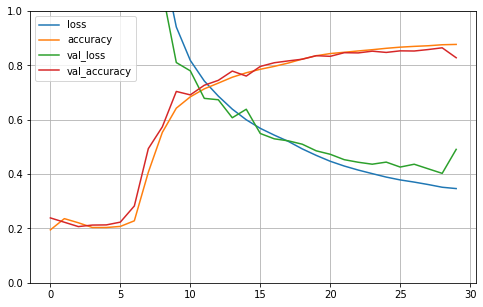

In [10]:
#可视化学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

#深层DNN前期loss下降慢的可能原因：
# 1. 参数众多，训练不充分，所以前期基本不变
# 2. 梯度消失 -> 链式法则 -> 复合函数f(g(x)) --可以加上批归一化来缓解
plot_learning_curves(history)

In [ ]:
#评估
model.evaluate(x_test_scaled, y_test, verbose = 1)